A Simple Starting Point


In [3]:
# import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get,Read and Clean the Data

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv

df_students = pd.read_csv('grades.csv')

df_students = df_students.dropna(axis=0,how='any')

passes = pd.Series(df_students['Grade']>=60)

df_students = pd.concat([df_students,passes.rename('Pass')],axis=1)

df_students

--2023-11-13 17:13:40--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.1'

     0K                                                       100% 5.40M=0s

2023-11-13 17:13:41 (5.40 MB/s) - 'grades.csv.1' saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


Visualize Data with Bar Chart

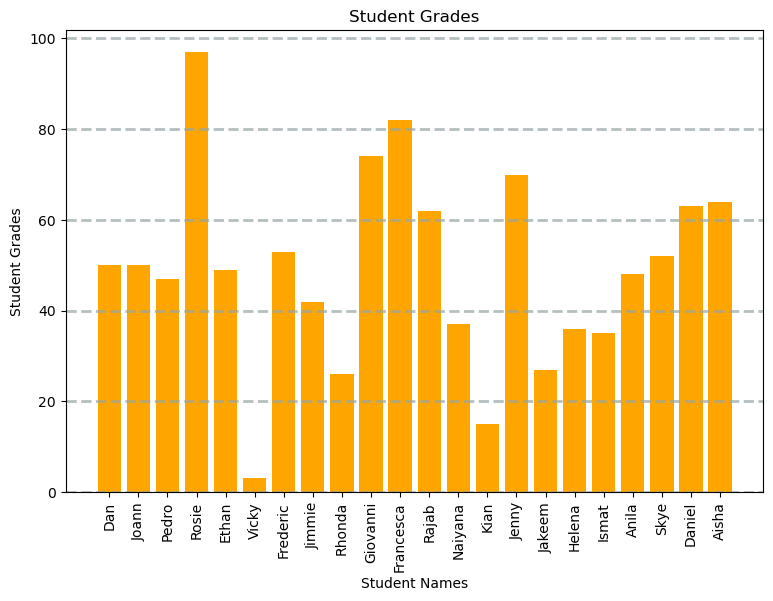

In [9]:
fig = plt.figure(figsize=(9,6))

plt.bar(x=df_students.Name,height=df_students.Grade,color='orange')

plt.title('Student Grades')
plt.xlabel('Student Names')
plt.ylabel('Student Grades')
plt.grid(color='#95a5a6',linestyle='--',linewidth=2,axis='y',alpha=0.7)
plt.xticks(rotation=90)

plt.show()

Working With Subplots

C:\Users\Admin\AppData\Local\Temp\ipykernel_10412\2271221588.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name,rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10412\2271221588.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


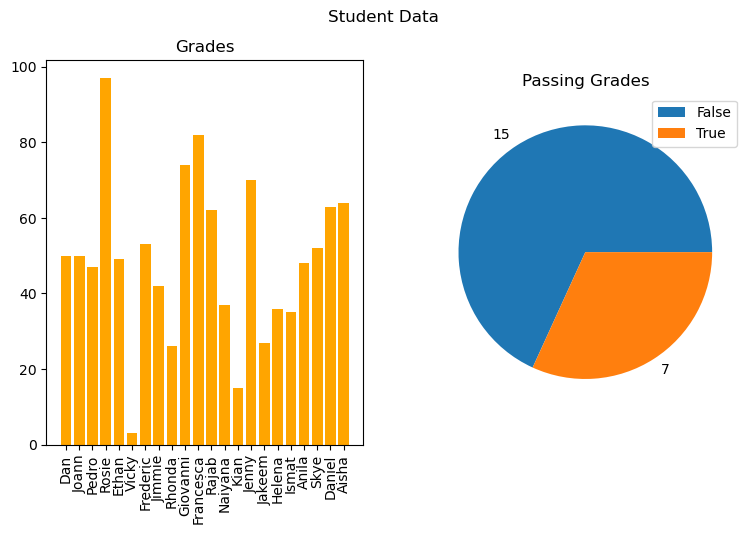

In [11]:
fig,ax = plt.subplots(1,2,figsize=(9,5))

ax[0].bar(x=df_students.Name,height=df_students.Grade,color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name,rotation=90)


pass_counts = df_students.Pass.value_counts()
ax[1].pie(pass_counts,labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

fig.suptitle('Student Data')

fig.show()

Visualizing Directly With Pandas DataFrame. i.e. without import matplotlib 
N.B.: Does not work if data contains NaN values

<AxesSubplot:xlabel='Name'>

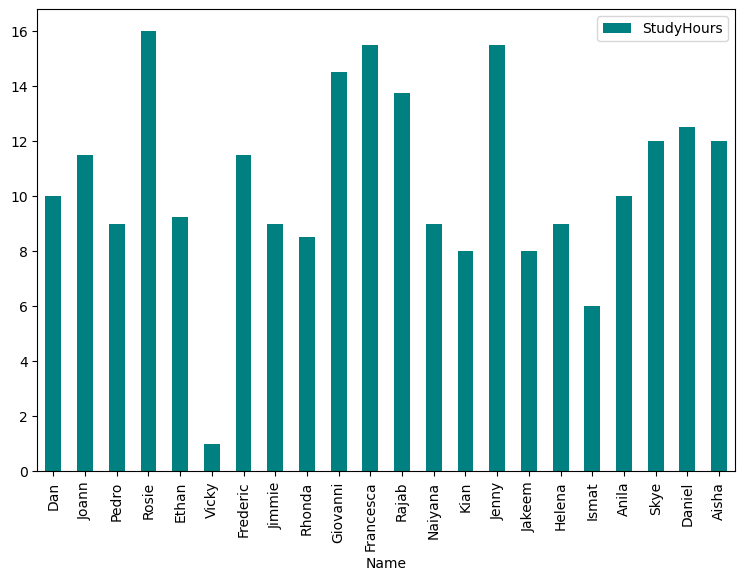

In [12]:
df_students.plot.bar(x='Name',y='StudyHours',color='teal',figsize=(9,6))

Data Distribution with Histogram

C:\Users\Admin\AppData\Local\Temp\ipykernel_10412\647587441.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


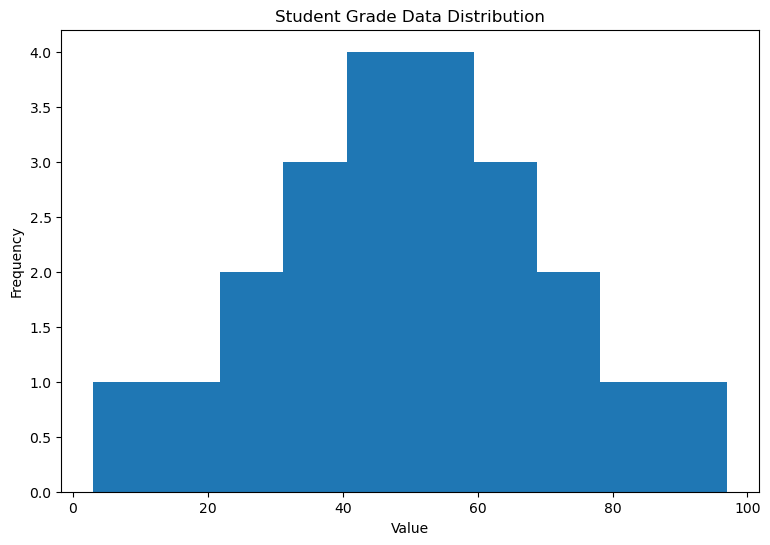

In [14]:
var_students = df_students['Grade']

fig = plt.figure(figsize=(9,6))

plt.hist(var_students)

plt.title('Student Grade Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

Measures of Central Tendency i.e. Mean, Mode, Median,Min,Max etc

Minimum:3.00
Maximum:97.00
Mean:49.18
Median:49.50


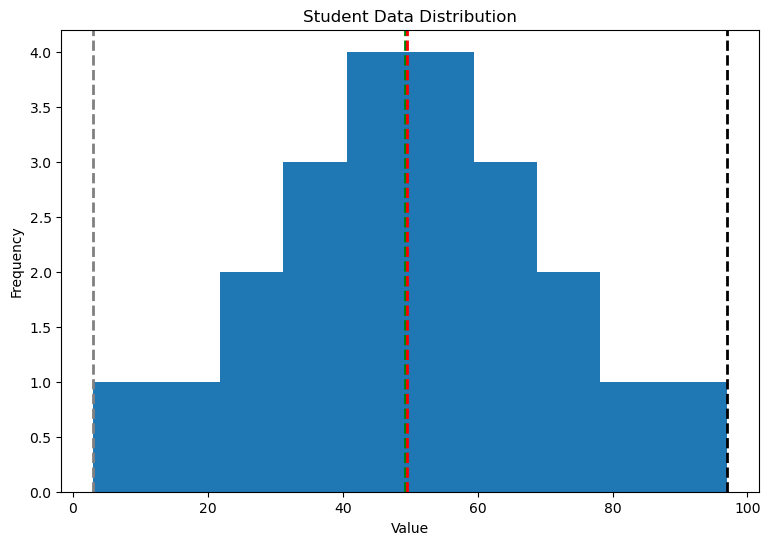

In [15]:
var = df_students['Grade']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
median_val = var.median()

print('Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}'.format(min_val,max_val,mean_val,median_val))

fig = plt.figure(figsize=(9,6))

plt.hist(var)

plt.axvline(x=min_val,color='gray',linestyle='dashed',linewidth=2)
plt.axvline(x=max_val,color='black',linestyle='dashed',linewidth=2)
plt.axvline(x=mean_val,color='green',linestyle='dashed',linewidth=2)
plt.axvline(x=median_val,color='red',linestyle='dashed',linewidth=2)

plt.title('Student Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Data Distribution with Boxplot

C:\Users\Admin\AppData\Local\Temp\ipykernel_10412\2644967597.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


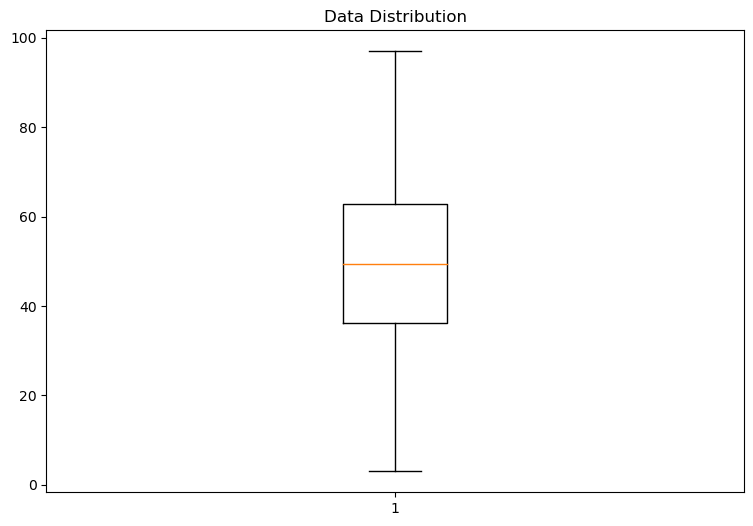

In [16]:
var = df_students.Grade

fig = plt.figure(figsize=(9,6))

plt.boxplot(var)

plt.title('Data Distribution')

fig.show()

To get clearer picture of the Data Distribution we write a function that combines Histogram with Boxplot as subplots

Minimum:3.00
Maximum:97.00
Mean:49.18
Median:49.50
Mode:50.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_10412\4007849469.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


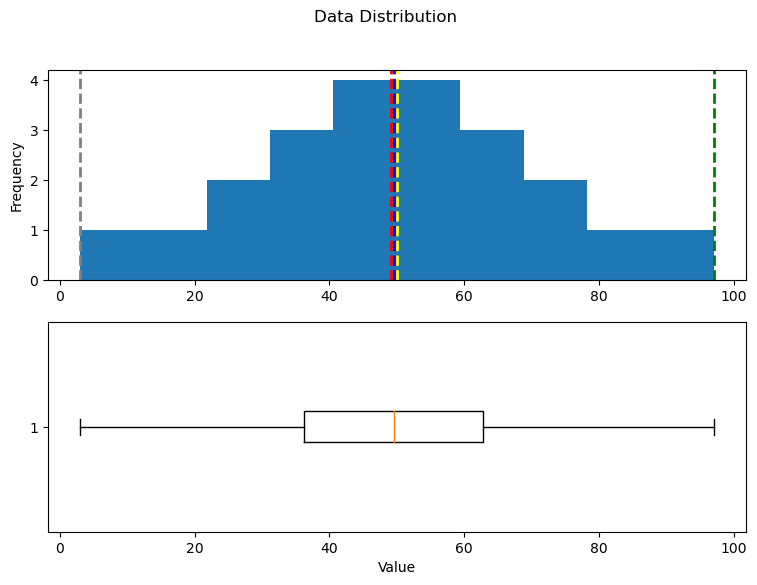

In [18]:
def show_distribution(var_data):
    import matplotlib.pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}'.format(min_val,max_val,mean_val,median_val,mode_val))

    fig,ax = plt.subplots(2,1,figsize=(9,6))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val,color='gray',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=max_val,color='green',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mean_val,color='red',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=median_val,color='blue',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mode_val,color='yellow',linestyle='dashed',linewidth=2)

    ax[1].boxplot(var_data,vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

    fig.show()

col = df_students['Grade']

show_distribution(col)

Visualize Probability Density

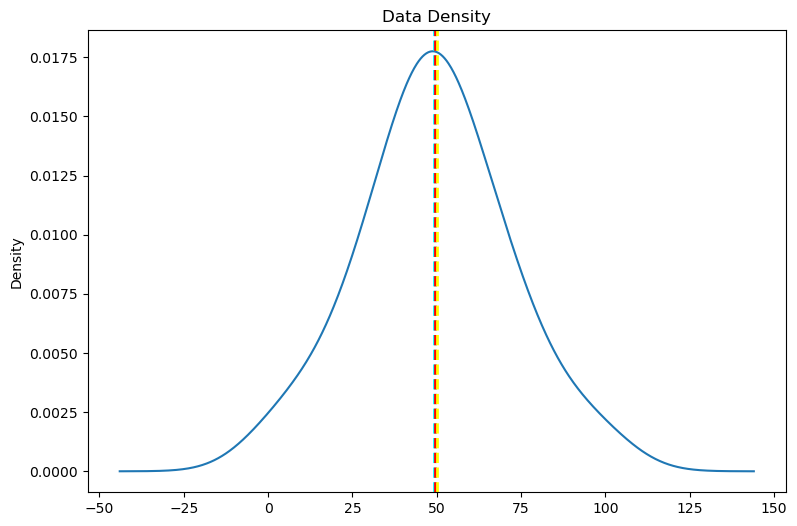

In [19]:
def show_density(var_data):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(9,6))

    var_data.plot.density()

    plt.title('Data Density')

    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

col=df_students.Grade

show_density(col)